1. 指定调参项目的名称查看结果对比

In [1]:
tune_result_dir = "results/grid_search/"
figure_mode = "pseudotime" # 展示图片的格式 arrow, stream, pseudotime
row_param_name = "is_ot"
col_param_name = "max_epochs"

# tune_result_dir = "results/model_train/"
# figure_mode = "pseudotime" # 展示图片的格式 arrow, stream, pseudotime
# row_param_name = ""
# col_param_name = "max_epochs"

# tune_result_dir = "results/model_structure/"
# figure_mode = "pseudotime" # 展示图片的格式 arrow, stream, pseudotime
# row_param_name = ""
# col_param_name = "n_hidden"

# tune_result_dir = "results/preprocess/"
# figure_mode = "pseudotime" # 展示图片的格式 arrow, stream, pseudotime
# row_param_name = ""
# col_param_name = "n_bnn_neighbors"

2. 构造DataFrame执行

In [2]:
import os
import re
import pandas as pd

df = pd.DataFrame()

# trail文件夹列表
trail_dir_list = [os.path.join(tune_result_dir, file) for file in os.listdir(tune_result_dir) if os.path.isdir(os.path.join(tune_result_dir, file))]
df["trail_dir"] = trail_dir_list

# 从trail文件夹名称提取使用正则表达式参数和值
pattern = r"\d+_([^\d]+)=([^=_]+)"
param_str_list = []
for trail_dir in trail_dir_list:
    match = re.findall(pattern, trail_dir)[0]
    param_name = match[0]
    param_value = match[1]
    param_str = param_name+"="+param_value
    param_str_list.append(param_str)
df["param_str"] = param_str_list

# 解析参数对
def get_param_value(row):
    param_pair_dict = row["param_str"].split(",")
    for param_pair in param_pair_dict:
        param_pair_item = param_pair.split("=")
        row[param_pair_item[0]] = param_pair_item[1]
    return row
df = df.apply(lambda x:get_param_value(x), axis=1)

# 添加图片文件路径
df["img_path"] = df["trail_dir"].apply(lambda x: "%s/figures/scvelo_%s.png"%(x, figure_mode))

if row_param_name == "":
    df[""] = ""
img_path_df = pd.pivot_table(df, values="img_path", index=row_param_name, columns=col_param_name, aggfunc="first")

img_path_df

max_epochs,10,20,30
is_ot,,,
False,results/grid_search/train_velovgi_e3382_00001_...,results/grid_search/train_velovgi_e3382_00003_...,results/grid_search/train_velovgi_e3382_00005_...
True,results/grid_search/train_velovgi_e3382_00000_...,results/grid_search/train_velovgi_e3382_00002_...,results/grid_search/train_velovgi_e3382_00004_...


3. 汇总结果

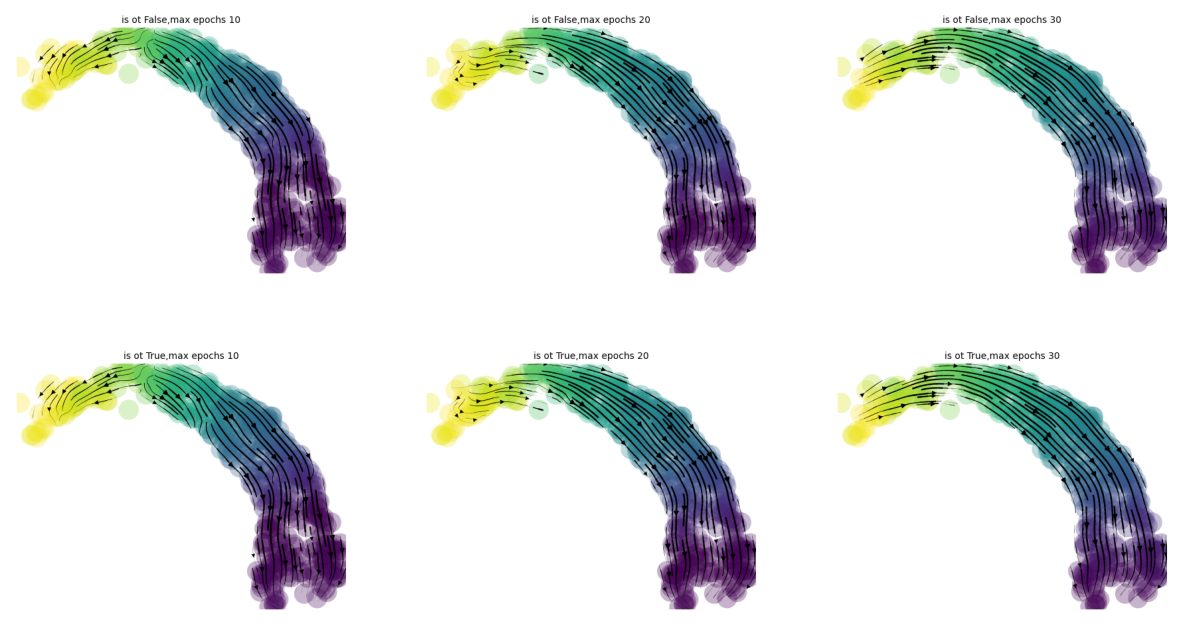

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

row_list = list(img_path_df.index)
col_list = list(img_path_df.columns)

rows, cols = img_path_df.shape
figsize = (5*cols,  4*rows)
fig, ax = plt.subplots(rows, cols, figsize=figsize)
ax = ax.flatten()

for i in range(len(row_list)):
    for j in range(len(col_list)):
        img_path = img_path_df.loc[row_list[i], col_list[j]]
        image = Image.open(img_path)
        ax[i*cols+j].imshow(image)
        ax[i*cols+j].axis("off")# 不显示坐标轴

plt.show()